In [22]:
import pandas as pd
import numpy as np

# od_1023=pd.read_csv('2020-10-23 PAO1 growth curve M63Arg 20 mM.csv')
# od_val_1023=od_1023.drop(['Time','Temperature(¡C)'],axis=1)
# od_val_1023=od_val_1023.iloc[:89, :]

od_1108=pd.read_csv('2020-11-08 PAO1 growth curve M63Arg 20 mM.csv')
od_val_1108=od_1108.drop(['Time','Temperature(¡C)'],axis=1)
od_val_1108=od_val_1108.iloc[:81, :]

od_1109=pd.read_csv('2020-11-09 PAO1 growth curve M63Arg 20 mM.csv')
od_val_1109=od_1109.drop(['Time','Temperature(¡C)'],axis=1)
od_val_1109=od_val_1109.iloc[:81, :]

od_1112=pd.read_csv('2020-11-12 PAO1 growth curve M63Arg 20 mM.csv')
od_val_1112=od_1112.drop(['Time','Temperature(¡C)'],axis=1)
od_val_1112=od_val_1112.iloc[:81, :]

In [23]:
# new labels for wells
AlphaNum_96=[]
for num in range(1,97):
    well_num='ABCDEFGH'[(num - 1) % 8] + '%01d' % ((num - 1) // 8 + 1,)
    AlphaNum_96.append(well_num)
    

# od_val_1023=od_val_1023[AlphaNum_96]
od_val_1108=od_val_1108[AlphaNum_96]
od_val_1109=od_val_1109[AlphaNum_96]
od_val_1112=od_val_1112[AlphaNum_96]

In [24]:
od_val_1108

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
0,0.1109,0.1141,0.1179,0.1203,0.1256,0.1245,0.1136,0.1202,0.1102,0.1157,...,0.1166,0.1245,0.1169,0.1214,0.1181,0.1137,0.1760,0.1118,0.1185,0.1184
1,0.1096,0.1115,0.1153,0.1158,0.1130,0.1245,0.1189,0.1178,0.1087,0.1152,...,0.1235,0.1293,0.1235,0.1198,0.1196,0.1160,0.1468,0.1156,0.1133,0.1183
2,0.1095,0.1114,0.1151,0.1156,0.1128,0.1242,0.1186,0.1176,0.1086,0.1152,...,0.1231,0.1289,0.1231,0.1196,0.1191,0.1152,0.1492,0.1154,0.1134,0.1180
3,0.1094,0.1112,0.1151,0.1154,0.1127,0.1240,0.1185,0.1172,0.1083,0.1150,...,0.1229,0.1287,0.1229,0.1192,0.1190,0.1152,0.1506,0.1152,0.1131,0.1181
4,0.1094,0.1112,0.1151,0.1154,0.1127,0.1240,0.1184,0.1172,0.1083,0.1150,...,0.1228,0.1286,0.1228,0.1192,0.1188,0.1149,0.1507,0.1152,0.1131,0.1179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.1089,0.1108,0.1146,0.1155,0.1121,0.1232,0.1180,0.1168,0.1078,0.1143,...,0.1219,0.1290,0.1217,0.1182,0.1181,0.1142,0.1494,0.1144,0.1124,0.1171
77,0.1090,0.1108,0.1145,0.1155,0.1121,0.1232,0.1180,0.1168,0.1079,0.1143,...,0.1219,0.1289,0.1217,0.1183,0.1180,0.1140,0.1491,0.1144,0.1125,0.1170
78,0.1088,0.1108,0.1145,0.1155,0.1121,0.1232,0.1180,0.1167,0.1078,0.1144,...,0.1219,0.1289,0.1217,0.1182,0.1181,0.1141,0.1493,0.1144,0.1123,0.1170
79,0.1089,0.1108,0.1145,0.1155,0.1122,0.1232,0.1179,0.1169,0.1079,0.1143,...,0.1218,0.1290,0.1216,0.1184,0.1179,0.1141,0.1491,0.1143,0.1126,0.1169


In [25]:
# extract blank wells
# in this particular set, column 10
# od_blank_1023 = od_1023[['A10', 'B10', 'C10', 'D10', 'E10',
#                          'F10', 'G10', 'H10']].copy()

# for 11-08 data, the blank columns on the plates were column 9 but only row B-G
od_blank_1108 = od_1108[['B9', 'C9', 'D9', 'E9', 'F9', 'G9']].copy()
# for 11-09 and 11-12 data, the blank wells on plates were column 8 but only row B-G
od_blank_1109 = od_1109[['B8', 'C8', 'D8', 'E8', 'F8', 'G8']].copy()
od_blank_1112 = od_1112[['B8', 'C8', 'D8', 'E8', 'F8', 'G8']].copy()

In [26]:
for i in range(0,81): 
    # od_val_1023.iloc[i]=od_val_1023.iloc[i]-min(od_blank_1023.iloc[i])
    od_val_1108.iloc[i]=od_val_1108.iloc[i]-min(od_blank_1108.iloc[i])
    od_val_1109.iloc[i]=od_val_1109.iloc[i]-min(od_blank_1109.iloc[i])
    od_val_1112.iloc[i]=od_val_1112.iloc[i]-min(od_blank_1112.iloc[i])
# if any values are negative after background adjustment, discard those wells at those timepoints (set to NaN)

# od_val_1023[od_val_1023 <= 0]=np.NaN
od_val_1108[od_val_1108 <= 0]=np.NaN
od_val_1109[od_val_1109 <= 0]=np.NaN
od_val_1112[od_val_1112 <= 0]=np.NaN

In [27]:
# od_val_1023.to_csv('od_val_1023_blanked.csv')
od_val_1108.to_csv('od_val_1108_blanked.csv')
od_val_1109.to_csv('od_val_1109_blanked.csv')
od_val_1112.to_csv('od_val_1112_blanked.csv')

In [28]:
# manually changed the headers of columns in each saved csv file
# to the experimental condition of that well in excel
# e.g. 'C1' - > 'WT + H2O'

# od_b1023=pd.read_csv('od_val_1023_cond.csv')
od_b1108=pd.read_csv('od_val_1108_cond.csv',nrows=81)
od_b1109=pd.read_csv('od_val_1109_cond.csv',nrows=81)
od_b1112=pd.read_csv('od_val_1112_cond.csv',nrows=81)

# extract data points for each condition from each experiment
# wt_1023_h2o=od_b1023.filter(regex="WT_H2O", axis=1)
wt_1108_h2o=od_b1108.filter(regex="WT_H2O", axis=1)
wt_1109_h2o=od_b1109.filter(regex="WT_H2O", axis=1)
wt_1112_h2o=od_b1112.filter(regex="WT_H2O", axis=1)
# join them all into a single dataframe
# wt_h2o_a=wt_1023_h2o.join(wt_1108_h2o, lsuffix='1023', rsuffix='1108')
wt_h2o_a=wt_1108_h2o
wt_h2o_b=wt_1109_h2o.join(wt_1112_h2o, lsuffix='1109', rsuffix='1112')
wt_h2o=wt_h2o_a.join(wt_h2o_b)

# wt_1023_kcl=od_b1023.filter(regex="WT_KCl", axis=1)
wt_1108_kcl=od_b1108.filter(regex="WT_KCl", axis=1)
wt_1109_kcl=od_b1109.filter(regex="WT_KCl", axis=1)
wt_1112_kcl=od_b1112.filter(regex="WT_KCl", axis=1)

# wt_kcl_a=wt_1023_kcl.join(wt_1108_kcl, lsuffix='1023', rsuffix='1108')
wt_kcl_a=wt_1108_kcl
wt_kcl_b=wt_1109_kcl.join(wt_1112_kcl, lsuffix='1109', rsuffix='1112')
wt_kcl=wt_kcl_a.join(wt_kcl_b)

# wt_1023_arg=od_b1023.filter(regex="WT_Arg", axis=1)
wt_1108_arg=od_b1108.filter(regex="WT_Arg", axis=1)
wt_1109_arg=od_b1109.filter(regex="WT_Arg", axis=1)
wt_1112_arg=od_b1112.filter(regex="WT_Arg", axis=1)

# wt_arg_a=wt_1023_arg.join(wt_1108_arg, lsuffix='1023', rsuffix='1108')
wt_arg_a=wt_1108_arg
wt_arg_b=wt_1109_arg.join(wt_1112_arg, lsuffix='1109', rsuffix='1112')
wt_arg=wt_arg_a.join(wt_arg_b)


# eps_1023_h2o=od_b1023.filter(regex="eps_H2O", axis=1)
eps_1108_h2o=od_b1108.filter(regex="eps_H2O", axis=1)
eps_1109_h2o=od_b1109.filter(regex="eps_H2O", axis=1)
eps_1112_h2o=od_b1112.filter(regex="eps_H2O", axis=1)

# eps_h2o_a=eps_1023_h2o.join(eps_1108_h2o, lsuffix='1023', rsuffix='1108')
eps_h2o_a=eps_1108_h2o
eps_h2o_b=eps_1109_h2o.join(eps_1112_h2o, lsuffix='1109', rsuffix='1112')
eps_h2o=eps_h2o_a.join(eps_h2o_b)


# eps_1023_kcl=od_b1023.filter(regex="eps_KCl", axis=1)
eps_1108_kcl=od_b1108.filter(regex="eps_KCl", axis=1)
eps_1109_kcl=od_b1109.filter(regex="eps_KCl", axis=1)
eps_1112_kcl=od_b1112.filter(regex="eps_KCl", axis=1)

# eps_kcl_a=eps_1023_kcl.join(eps_1108_kcl, lsuffix='1023', rsuffix='1108')
eps_kcl_a=eps_1108_kcl
eps_kcl_b=eps_1109_kcl.join(eps_1112_kcl, lsuffix='1109', rsuffix='1112')
eps_kcl=eps_kcl_a.join(eps_kcl_b)


# eps_1023_arg=od_b1023.filter(regex="eps_Arg", axis=1)
eps_1108_arg=od_b1108.filter(regex="eps_Arg", axis=1)
eps_1109_arg=od_b1109.filter(regex="eps_Arg", axis=1)
eps_1112_arg=od_b1112.filter(regex="eps_Arg", axis=1)

# eps_arg_a=eps_1023_arg.join(eps_1108_arg, lsuffix='1023', rsuffix='1108')
eps_arg_a=eps_1108_arg
eps_arg_b=eps_1109_arg.join(eps_1112_arg, lsuffix='1109', rsuffix='1112')
eps_arg=eps_arg_a.join(eps_arg_b)


In [29]:
wt_1108_h2o

,WT_H2O,WT_H2O.1,WT_H2O.2,WT_H2O.3,WT_H2O.4,WT_H2O.5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0032,NaN,NaN,NaN,0.0039,0.0021
2,0.0037,NaN,NaN,NaN,0.0042,0.0024
3,0.0041,NaN,NaN,NaN,0.0044,0.0024
4,0.0043,NaN,NaN,NaN,0.0047,0.0026
...,...,...,...,...,...,...
76,0.2783,0.2592,0.2739,0.2703,0.2714,0.2659
77,0.2779,0.2586,0.2734,0.2693,0.2701,0.2653
78,0.2773,0.2575,0.2723,0.2678,0.2689,0.2642
79,0.2796,0.2565,0.2698,0.2674,0.2692,0.2613


In [30]:
od_b1108

,Unnamed: 0,A1,B1,C1,D1,E1,F1,G1,H1,A2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0426,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,0.0019,NaN,NaN,NaN,...,0.0009,0.0067,0.0009,NaN,NaN,NaN,0.0242,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,0.0022,NaN,NaN,NaN,...,0.0011,0.0069,0.0011,NaN,NaN,NaN,0.0272,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,0.0023,NaN,NaN,NaN,...,0.0012,0.0070,0.0012,NaN,NaN,NaN,0.0289,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,0.0025,NaN,NaN,NaN,...,0.0013,0.0071,0.0013,NaN,NaN,NaN,0.0292,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,NaN,NaN,NaN,NaN,NaN,0.0045,NaN,NaN,NaN,...,0.0032,0.0103,0.0030,NaN,NaN,NaN,0.0307,NaN,NaN,NaN
77,77,NaN,NaN,NaN,NaN,NaN,0.0046,NaN,NaN,NaN,...,0.0033,0.0103,0.0031,NaN,NaN,NaN,0.0305,NaN,NaN,NaN
78,78,NaN,NaN,NaN,NaN,NaN,0.0046,NaN,NaN,NaN,...,0.0033,0.0103,0.0031,NaN,NaN,NaN,0.0307,NaN,NaN,NaN
79,79,NaN,NaN,NaN,NaN,NaN,0.0047,NaN,NaN,NaN,...,0.0033,0.0105,0.0031,NaN,NaN,NaN,0.0306,NaN,NaN,NaN


In [31]:
# fill NaN (i.e. values <0 after background normalization with 0s)
wt_h2o=wt_h2o.fillna(0)
wt_kcl=wt_kcl.fillna(0)
wt_arg=wt_arg.fillna(0)

eps_h2o=eps_h2o.fillna(0)
eps_kcl=eps_kcl.fillna(0)
eps_arg=eps_arg.fillna(0)

In [32]:
wt_h2o

,WT_H2O,WT_H2O.1,WT_H2O.2,WT_H2O.3,WT_H2O.4,WT_H2O.5,WT_H2O1109,WT_H2O.11109,WT_H2O.21109,WT_H2O.31109,WT_H2O.41109,WT_H2O.51109,WT_H2O1112,WT_H2O.11112,WT_H2O.21112,WT_H2O.31112,WT_H2O.41112,WT_H2O.51112
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0085,0.0145,0.0049,0.0065,0.0087,0.0131,0.0096,0.0113,0.0108,0.0109,0.0165,0.0163
1,0.0032,0.0000,0.0000,0.0000,0.0039,0.0021,0.0052,0.0116,0.0023,0.0040,0.0054,0.0112,0.0095,0.0077,0.0108,0.0102,0.0158,0.0150
2,0.0037,0.0000,0.0000,0.0000,0.0042,0.0024,0.0064,0.0131,0.0035,0.0049,0.0068,0.0128,0.0176,0.0157,0.0190,0.0177,0.0245,0.0223
3,0.0041,0.0000,0.0000,0.0000,0.0044,0.0024,0.0091,0.0151,0.0053,0.0112,0.0133,0.0188,0.0206,0.0245,0.0218,0.0191,0.0266,0.0253
4,0.0043,0.0000,0.0000,0.0000,0.0047,0.0026,0.0190,0.0250,0.0150,0.0163,0.0189,0.0245,0.0258,0.0241,0.0269,0.0265,0.0315,0.0305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.2783,0.2592,0.2739,0.2703,0.2714,0.2659,0.2663,0.2712,0.2478,0.2537,0.2749,0.2747,0.3583,0.3562,0.3514,0.3609,0.3551,0.3605
77,0.2779,0.2586,0.2734,0.2693,0.2701,0.2653,0.2671,0.2704,0.2481,0.2538,0.2751,0.2750,0.3570,0.3550,0.3501,0.3606,0.3547,0.3592
78,0.2773,0.2575,0.2723,0.2678,0.2689,0.2642,0.2664,0.2704,0.2481,0.2540,0.2751,0.2748,0.3566,0.3539,0.3493,0.3591,0.3539,0.3582
79,0.2796,0.2565,0.2698,0.2674,0.2692,0.2613,0.2662,0.2699,0.2478,0.2540,0.2748,0.2746,0.3556,0.3528,0.3474,0.3579,0.3520,0.3571


In [33]:
time_points=np.linspace(0, 20, 81)
# print(time_points)
wt_h2o.insert(0, "Time (hr)", time_points, True)
wt_kcl.insert(0, "Time (hr)", time_points, True)
wt_arg.insert(0, "Time (hr)", time_points, True)

eps_h2o.insert(0, "Time (hr)", time_points, True)
eps_kcl.insert(0, "Time (hr)", time_points, True)
eps_arg.insert(0, "Time (hr)", time_points, True)


In [34]:
wt_h2o

,Time (hr),WT_H2O,WT_H2O.1,WT_H2O.2,WT_H2O.3,WT_H2O.4,WT_H2O.5,WT_H2O1109,WT_H2O.11109,WT_H2O.21109,WT_H2O.31109,WT_H2O.41109,WT_H2O.51109,WT_H2O1112,WT_H2O.11112,WT_H2O.21112,WT_H2O.31112,WT_H2O.41112,WT_H2O.51112
0,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0085,0.0145,0.0049,0.0065,0.0087,0.0131,0.0096,0.0113,0.0108,0.0109,0.0165,0.0163
1,0.25,0.0032,0.0000,0.0000,0.0000,0.0039,0.0021,0.0052,0.0116,0.0023,0.0040,0.0054,0.0112,0.0095,0.0077,0.0108,0.0102,0.0158,0.0150
2,0.50,0.0037,0.0000,0.0000,0.0000,0.0042,0.0024,0.0064,0.0131,0.0035,0.0049,0.0068,0.0128,0.0176,0.0157,0.0190,0.0177,0.0245,0.0223
3,0.75,0.0041,0.0000,0.0000,0.0000,0.0044,0.0024,0.0091,0.0151,0.0053,0.0112,0.0133,0.0188,0.0206,0.0245,0.0218,0.0191,0.0266,0.0253
4,1.00,0.0043,0.0000,0.0000,0.0000,0.0047,0.0026,0.0190,0.0250,0.0150,0.0163,0.0189,0.0245,0.0258,0.0241,0.0269,0.0265,0.0315,0.0305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,19.00,0.2783,0.2592,0.2739,0.2703,0.2714,0.2659,0.2663,0.2712,0.2478,0.2537,0.2749,0.2747,0.3583,0.3562,0.3514,0.3609,0.3551,0.3605
77,19.25,0.2779,0.2586,0.2734,0.2693,0.2701,0.2653,0.2671,0.2704,0.2481,0.2538,0.2751,0.2750,0.3570,0.3550,0.3501,0.3606,0.3547,0.3592
78,19.50,0.2773,0.2575,0.2723,0.2678,0.2689,0.2642,0.2664,0.2704,0.2481,0.2540,0.2751,0.2748,0.3566,0.3539,0.3493,0.3591,0.3539,0.3582
79,19.75,0.2796,0.2565,0.2698,0.2674,0.2692,0.2613,0.2662,0.2699,0.2478,0.2540,0.2748,0.2746,0.3556,0.3528,0.3474,0.3579,0.3520,0.3571


In [35]:
wt_h2o.to_csv('wt_h2o_OD.csv')
wt_kcl.to_csv('wt_kcl_OD.csv')
wt_arg.to_csv('wt_arg_OD.csv')

eps_h2o.to_csv('eps_h2o_OD.csv')
eps_kcl.to_csv('eps_kcl_OD.csv')
eps_arg.to_csv('eps_arg_OD.csv')

# we noticed that the well E8 in the 2020-11-08 plate has an abnormally high OD reading
# we suspect that 2020-11-08 E8 might have had a great deal of condensation
# As a result, all time points from 2020-11-08 E8 was excluded from analysis
eps_arg=eps_arg.drop(columns='eps_Arg.3')


In [36]:
# calculate growth rate for each treatment & genotype
gr_wt_h2o=wt_h2o.drop(columns=['Time (hr)']).diff()/0.25
gr_wt_kcl=wt_kcl.drop(columns=['Time (hr)']).diff()/0.25
gr_wt_arg=wt_arg.drop(columns=['Time (hr)']).diff()/0.25

gr_eps_h2o=eps_h2o.drop(columns=['Time (hr)']).diff()/0.25
gr_eps_kcl=eps_kcl.drop(columns=['Time (hr)']).diff()/0.25
gr_eps_arg=eps_arg.drop(columns=['Time (hr)']).diff()/0.25


# find the max growth rate for each treatment
max_wt_h2o=gr_wt_h2o.max().values
max_wt_kcl=gr_wt_kcl.max().values
max_wt_arg=gr_wt_arg.max().values

max_eps_h2o=gr_eps_h2o.max().values
max_eps_kcl=gr_eps_kcl.max().values
max_eps_arg=gr_eps_arg.max().values

# max_gr=pd.DataFrame(max_wt_h2o, max_wt_kcl, columns=['a', 'b'])

gr_max=[max_wt_h2o, max_wt_kcl, max_wt_arg, max_eps_h2o, max_eps_kcl, max_eps_arg]
gr_max_df=pd.DataFrame(data=gr_max, index=['max_wt_h2o','max_wt_kcl','max_wt_arg',
                                           'max_eps_h2o','max_eps_kcl','max_eps_arg'])

gr_max_df
gr_max_df.to_csv('max_growth_rate.csv')

# analyze and plot the data in matlab

In [37]:
# find max OD for each growth curve
maxOD_wt_h2o=wt_h2o.drop(columns=['Time (hr)']).max().values
maxOD_wt_kcl=wt_kcl.drop(columns=['Time (hr)']).max().values
maxOD_wt_arg=wt_arg.drop(columns=['Time (hr)']).max().values

maxOD_eps_h2o=eps_h2o.drop(columns=['Time (hr)']).max().values
maxOD_eps_kcl=eps_kcl.drop(columns=['Time (hr)']).max().values
maxOD_eps_arg=eps_arg.drop(columns=['Time (hr)']).max().values

OD_max=[maxOD_wt_h2o, maxOD_wt_kcl, maxOD_wt_arg, 
        maxOD_eps_h2o, maxOD_eps_kcl, maxOD_eps_arg]
OD_max_df=pd.DataFrame(data=OD_max, index=['max_wt_h2o','max_wt_kcl','max_wt_arg',
                                           'max_eps_h2o','max_eps_kcl','max_eps_arg'])
OD_max_df

OD_max_df.to_csv('max_OD.csv')

In [38]:
# find the OD for each growth curve at t=8 hr
ODt8_wt_h2o=wt_h2o.drop(columns=['Time (hr)']).loc[32,:].values


ODt8_wt_kcl=wt_kcl.drop(columns=['Time (hr)']).loc[32,:].values
ODt8_wt_arg=wt_arg.drop(columns=['Time (hr)']).loc[32,:].values

ODt8_eps_h2o=eps_h2o.drop(columns=['Time (hr)']).loc[32,:].values
ODt8_eps_kcl=eps_kcl.drop(columns=['Time (hr)']).loc[32,:].values
ODt8_eps_arg=eps_arg.drop(columns=['Time (hr)']).loc[32,:].values

ODt8=[ODt8_wt_h2o, ODt8_wt_kcl, ODt8_wt_arg, 
     ODt8_eps_h2o, ODt8_eps_kcl, ODt8_eps_arg]
ODt8_df=pd.DataFrame(data=ODt8, index=['t8_wt_h2o','t8_wt_kcl','t8_wt_arg',
                                       't8_eps_h2o','t8_eps_kcl','t8_eps_arg'])

ODt8_df
ODt8_df.to_csv('OD_8hr.csv')

In [39]:
# convert dataframe into long form
wt_h2o_l = wt_h2o.melt('Time (hr)', var_name='cols',  value_name='OD600')
wt_kcl_l = wt_kcl.melt('Time (hr)', var_name='cols',  value_name='OD600')
wt_arg_l = wt_arg.melt('Time (hr)', var_name='cols',  value_name='OD600')

eps_h2o_l = eps_h2o.melt('Time (hr)', var_name='cols',  value_name='OD600')
eps_kcl_l = eps_kcl.melt('Time (hr)', var_name='cols',  value_name='OD600')
eps_arg_l = eps_arg.melt('Time (hr)', var_name='cols',  value_name='OD600')

In [40]:
wt_h2o_l

,Time (hr),cols,OD600
0,0.00,WT_H2O,0.0000
1,0.25,WT_H2O,0.0032
2,0.50,WT_H2O,0.0037
3,0.75,WT_H2O,0.0041
4,1.00,WT_H2O,0.0043
...,...,...,...
1453,19.00,WT_H2O.51112,0.3605
1454,19.25,WT_H2O.51112,0.3592
1455,19.50,WT_H2O.51112,0.3582
1456,19.75,WT_H2O.51112,0.3571


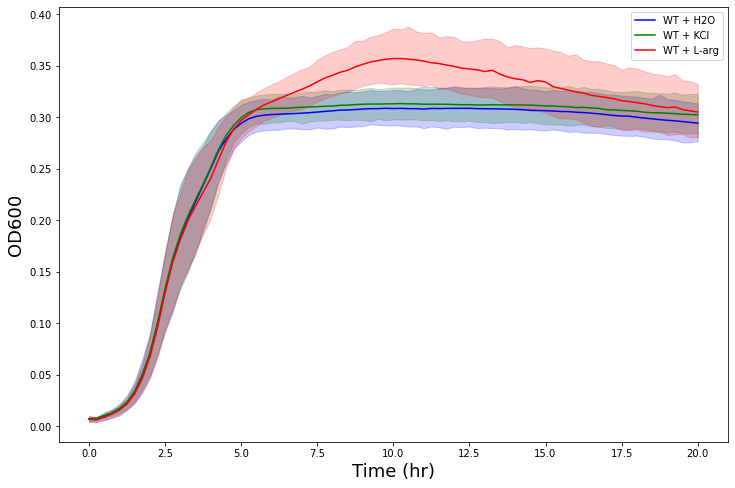

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot WT
fig1, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(data=wt_h2o_l, x="Time (hr)", y="OD600", ax=ax, label='WT + H2O', color='blue')
sns.lineplot(data=wt_kcl_l, x="Time (hr)", y="OD600", ax=ax, label='WT + KCl', color='green')
sns.lineplot(data=wt_arg_l, x="Time (hr)", y="OD600", ax=ax, label='WT + L-arg',color='red')

plt.xlabel("Time (hr)", size=18)
plt.ylabel("OD600", size=18)

fig1.savefig("wt_growth.pdf")

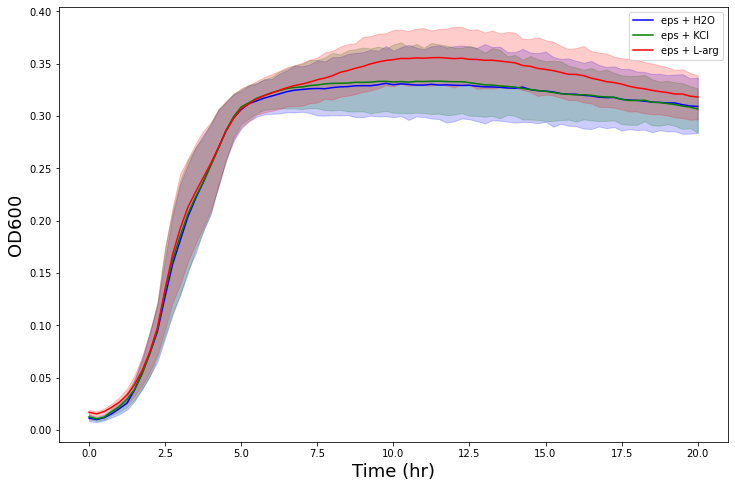

In [42]:
# plot EPS mutant
fig2, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(data=eps_h2o_l, x="Time (hr)", y="OD600", ax=ax, label='eps + H2O', color='blue')
sns.lineplot(data=eps_kcl_l, x="Time (hr)", y="OD600", ax=ax, label='eps + KCl', color='green')
sns.lineplot(data=eps_arg_l, x="Time (hr)", y="OD600", ax=ax, label='eps + L-arg',color='red')

plt.xlabel("Time (hr)", size=18)
plt.ylabel("OD600", size=18)

fig2.savefig("eps_growth.pdf")